In [69]:
import streamlit as st
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
df= pd.read_csv("boxing_data_raw.csv",
                header = None, 
                names = ['Rank','Name','empty1','Weight Class','Record','Age','empty2','Location'],
                usecols=['Rank','Name','Weight Class','Record','Age','Location'],
                skip_blank_lines = True)
df.head()

,Rank,Name,Weight Class,Record,Age,Location
0,NaN,Saul Alvarez,super middle,58 2 2,32.0,"Guadalajara, Jalisco, Mexico"
1,#2,Tyson Fury,heavy,33 0 1,34.0,"Morecambe, Lancashire, United Kingdom"
2,#3,Dmitrii Bivol,light heavy,21 0 0,31.0,"Indio, California, USA"
3,#4,Terence Crawford,welter,39 0 0,35.0,"Omaha, Nebraska, USA"
4,#5,Gennadiy Golovkin,middle,42 2 1,40.0,"Los Angeles, California, USA"


In [71]:
# TODO split out wins losses and draws and calculate win percentage
record_split = df.Record.str.split(expand = True).rename(columns = {0:'Wins',1:'Losses',2:'Draws'})
df = pd.concat([df, record_split], axis = 1)

In [72]:
location_split = df.Location.str.rsplit(expand = True, n = 2, pat = ',').rename(columns = {0:'Region1',1:'Region2',2:'Country'})
df = pd.concat([df, location_split], axis = 1)

In [73]:
df.head()

,Rank,Name,Weight Class,Record,Age,Location,Wins,Losses,Draws,Region1,Region2,Country
0,NaN,Saul Alvarez,super middle,58 2 2,32.0,"Guadalajara, Jalisco, Mexico",58,2,2,Guadalajara,Jalisco,Mexico
1,#2,Tyson Fury,heavy,33 0 1,34.0,"Morecambe, Lancashire, United Kingdom",33,0,1,Morecambe,Lancashire,United Kingdom
2,#3,Dmitrii Bivol,light heavy,21 0 0,31.0,"Indio, California, USA",21,0,0,Indio,California,USA
3,#4,Terence Crawford,welter,39 0 0,35.0,"Omaha, Nebraska, USA",39,0,0,Omaha,Nebraska,USA
4,#5,Gennadiy Golovkin,middle,42 2 1,40.0,"Los Angeles, California, USA",42,2,1,Los Angeles,California,USA


In [74]:
df.Rank = df.Rank.str.replace('#','')
df.Name = df.Name.str.replace('*','')

/var/folders/g5/976jnxrx0jb_mz1_w_t3_yhr0000gp/T/ipykernel_90835/319838579.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Name = df.Name.str.replace('*','')


In [80]:
df.dropna(how = 'all',inplace=True)

In [84]:
df = df.astype({'Rank': 'float', 'Wins': 'float','Losses': 'float','Draws': 'float'})

In [85]:
df.sample(10)

,Rank,Name,Weight Class,Record,Age,Location,Wins,Losses,Draws,Region1,Region2,Country
665,667.0,Marc Leach,super bantam,18 2 1,28.0,"Salford, Lancashire, United Kingdom",18.0,2.0,1.0,Salford,Lancashire,United Kingdom
108,105.0,Joet Gonzalez,feather,25 3 0,29.0,"Los Angeles, California, USA",25.0,3.0,0.0,Los Angeles,California,USA
224,217.0,Egidijus \n Kavaliauskas,welter,23 2 1,34.0,"Camarillo, California, USA",23.0,2.0,1.0,Camarillo,California,USA
838,832.0,Ryuya Tsugawa,super bantam,9 1 0,22.0,"Sakai, Osaka, Japan",9.0,1.0,0.0,Sakai,Osaka,Japan
44,43.0,Cody Crowley,welter,21 0 0,29.0,"Las Vegas, Nevada, USA",21.0,0.0,0.0,Las Vegas,Nevada,USA
453,463.0,Anas Messaoudi,welter,14 0 0,29.0,"Ixelles, Bruxelles-Capitale, Belgium",14.0,0.0,0.0,Ixelles,Bruxelles-Capitale,Belgium
313,327.0,Maurice Hooker,welter,27 3 3,33.0,"Dallas, Texas, USA",27.0,3.0,3.0,Dallas,Texas,USA
590,594.0,Ruben Torres,light,19 1 0,25.0,"Santa Monica, California, USA",19.0,1.0,0.0,Santa Monica,California,USA
581,585.0,Alejandro Luis \n Silva,super welter,19 0 1,29.0,"Avellaneda, Buenos Aires, Argentina",19.0,0.0,1.0,Avellaneda,Buenos Aires,Argentina
544,550.0,Omar Salcido Gamez,light,17 0 0,23.0,"Hermosillo, Sonora, Mexico",17.0,0.0,0.0,Hermosillo,Sonora,Mexico


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1012
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          975 non-null    float64
 1   Name          976 non-null    object 
 2   Weight Class  973 non-null    object 
 3   Record        976 non-null    object 
 4   Age           965 non-null    float64
 5   Location      975 non-null    object 
 6   Wins          976 non-null    float64
 7   Losses        976 non-null    float64
 8   Draws         976 non-null    float64
 9   Region1       975 non-null    object 
 10  Region2       967 non-null    object 
 11  Country       733 non-null    object 
dtypes: float64(5), object(7)
memory usage: 99.1+ KB


array([[<AxesSubplot: title={'center': 'Rank'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Wins'}>,
        <AxesSubplot: title={'center': 'Losses'}>],
       [<AxesSubplot: title={'center': 'Draws'}>, <AxesSubplot: >]],
      dtype=object)

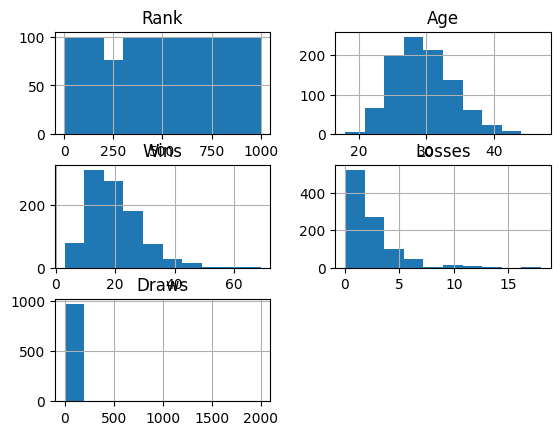

In [87]:
df.hist()

In [14]:
df.to_csv('boxing_data_cleaned.csv',index = False)